<a href="https://colab.research.google.com/github/aninsung/Machine-Learning-Programming/blob/main/RNN%2CLSTM(9%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [2]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)


In [3]:

# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
X_train.shape, X_test.shape

((250, 12, 1), (63, 12, 1))

In [6]:
X_train[0].shape, X_test[0].shape

((12, 1), (12, 1))

In [7]:
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
RNN.compile(optimizer='adam', loss='mse')
RNN.fit(X, y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 0.0318
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0053
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0023
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0025
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0026
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0020
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoc

In [9]:
RNN.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 8.3470e-04


0.0009218790801241994

In [10]:
y_pred = RNN.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 498ms/step


In [11]:
mse = tf.reduce_mean(tf.square(y_test - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0009218788326517622


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


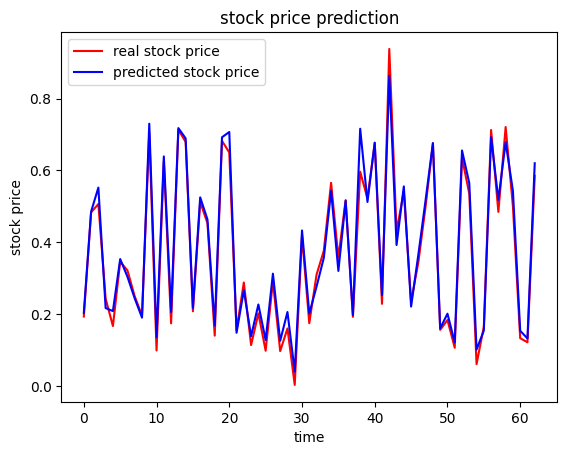

In [12]:
pred_y = RNN.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()


#  LSTM 모델

In [13]:

LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
LSTM .compile(optimizer='adam', loss='mse')
LSTM .fit(X, y, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1237
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0071
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0102
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0068
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0080
Epoch 16/50
40/

In [14]:
LSTM.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0032 


0.0034471030812710524

In [15]:
y_pred = LSTM.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [16]:
mse = tf.reduce_mean(tf.square(y_test - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.0034471031581000612


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


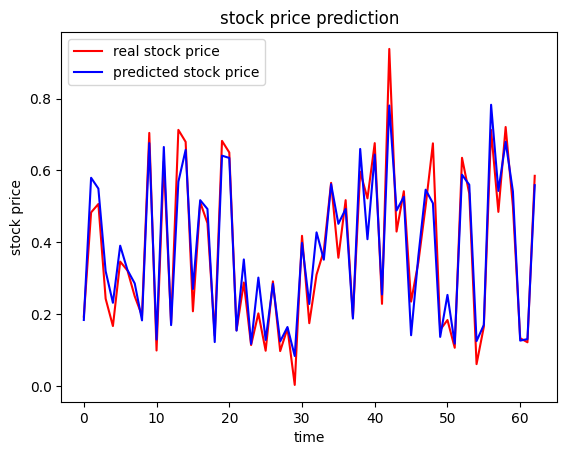

In [17]:
pred_y = LSTM.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()